#Imports

In [ ]:
#pip install --upgrade jaxlib
!pip install jaxlib==0.4.23
!pip install jax==0.4.23

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.4.33 requires jaxlib<=0.4.33,>=0.4.33, but you have jaxlib 0.4.23 which is incompatible.
optax 0.2.3 requires jaxlib>=0.4.27, but you have jaxlib 0.4.23 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.8.5 requ

In [ ]:
pip install --upgrade e3nn-jax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install -q git+https://www.github.com/google/jax-md

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.4 MB/s eta 0:00:00


In [ ]:
pip install sympy

In [ ]:
pip install scikit-image

In [ ]:
import jax.numpy as np
import numpy as onp
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from jax.nn import relu
from jax import jit
from jax import vmap, pmap
from jax import lax
from jax import random
from jax import grad, value_and_grad, hessian, jacfwd, jacrev, jvp

#from jax.config import config
#config.update('jax_enable_x64', True)

from jax_md import space
from jax_md import quantity
from jax_md.quantity import box_size_at_number_density



from sympy import symbols
from sympy.plotting import plot
from sympy import diff, tanh

from scipy.sparse import csgraph

from functools import partial

import math
import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

In [ ]:
displacement, shift = space.free()
metric = space.metric(displacement)
displacement = space.map_product(displacement)
metric = space.map_product(metric)

In [ ]:
epsilon = 0.01
alpha = 10

eta_1 = 1e-2
eta_2 = 1e-8

In [ ]:
def square_lattice(N, box_size):
  Nx = int(np.sqrt(N))
  Ny, ragged = divmod(N, Nx)
  if Ny != Nx or ragged:
    assert ValueError('Particle count should be a square. Found {}.'.format(N))
  length_scale = box_size / (Nx-1)
  R = []
  for i in range(Nx):
    for j in range(Ny):
      R.append([i * length_scale, j * length_scale])
  return np.array(R)

In [ ]:
rand_key=3
rand_key2=100

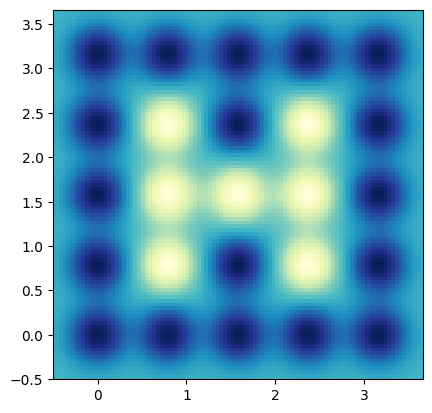

In [ ]:
N = 25
dim = 2

box_size = box_size_at_number_density(particle_count = N, number_density = N/10, spatial_dimension = dim)
R_target = square_lattice(N, box_size)
C_target = random.choice(random.PRNGKey(rand_key2), np.array([-1.0, 1.0]), (R_target.shape[0],1))
C_target=C_target.at[1].set(1)
C_target=C_target.at[2].set(1)
C_target=C_target.at[3].set(1)
C_target=C_target.at[7].set(-1)
C_target=C_target.at[9].set(1)
C_target=C_target.at[11].set(1)
C_target=C_target.at[12].set(-1)
C_target=C_target.at[13].set(1)
C_target=C_target.at[15].set(1)
C_target=C_target.at[16].set(-1)
C_target=C_target.at[17].set(-1)
C_target=C_target.at[20].set(1)
C_target=C_target.at[22].set(1)
C_target=C_target.at[24].set(1)

def phi_field(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R_target)))), np.squeeze(C_target)))

batch_phi_field = vmap(phi_field)

n = 100

xmin = np.min(R_target[:,0]) - 0.5
xmax = np.max(R_target[:,0]) + 0.5
ymin = np.min(R_target[:,1]) - 0.5
ymax = np.max(R_target[:,1]) + 0.5

X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')

ax.pcolormesh(X, Y, np.reshape(batch_phi_field(positions_list), (n,n)), cmap='YlGnBu')

plt.show()

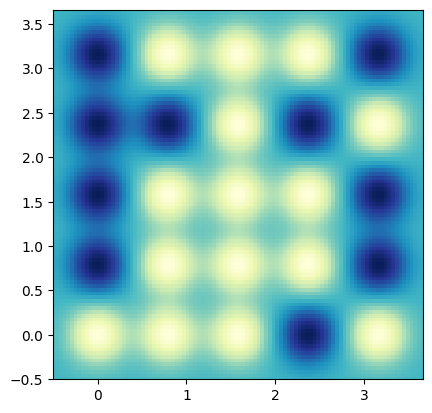

In [ ]:
N = 25
dim = 2

box_size = box_size_at_number_density(particle_count = N, number_density = N/10, spatial_dimension = dim)
R0 = square_lattice(N, box_size)
C0 = random.choice(random.PRNGKey(rand_key), np.array([-1.0, 1.0]), (R0.shape[0],1))

def phi_field(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R0)))), np.squeeze(C0)))

batch_phi_field = vmap(phi_field)

n = 100

xmin = np.min(R0[:,0]) - 0.5
xmax = np.max(R0[:,0]) + 0.5
ymin = np.min(R0[:,1]) - 0.5
ymax = np.max(R0[:,1]) + 0.5

X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')

ax.pcolormesh(X, Y, np.reshape(batch_phi_field(positions_list), (n,n)), cmap='YlGnBu')

plt.show()

In [ ]:
np.dtype(C0)

dtype('float32')

Potential

Eulerian Domain

In [ ]:
n = 100
xmin = np.min(R0[:,0]) - 0.5
xmax = np.max(R0[:,0]) + 0.5
ymin = np.min(R0[:,1]) - 0.5
ymax = np.max(R0[:,1]) + 0.5
X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

In [ ]:
def landau(C):

  eta = 1e1
  beta = 10
  dx2 = ((xmax-xmin)/n)**2

  def phi_field(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R0)))), np.squeeze(C) ))

  def grad_phi_field(x):
    return jacrev(phi_field, argnums=0)(x)

  batch_phi_field = vmap(phi_field)
  batch_grad_phi_field = vmap(grad_phi_field)

  return 0.0001*dx2*np.einsum('i->', 5e2*np.square(1 - np.square(batch_phi_field(positions_list))) + np.einsum('ij->i', np.square(np.squeeze(batch_grad_phi_field(positions_list)))) )


Control

In [ ]:
def terminal_cost(C):

  # dx2 = ((xmax-xmin)/n)**2

  def phi_field(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R0)))), np.squeeze(C) ))

  def phi_field_target(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R_target)))), np.squeeze(C_target) ))

  batch_phi_field = vmap(phi_field)
  batch_phi_field_target = vmap(phi_field_target)

  phi_eval_euler = batch_phi_field(positions_list)
  phi_eval_euler_target = batch_phi_field_target(positions_list)

  #  return 1e-1*np.einsum('i,i->' , phi_eval_euler-phi_eval_euler_target, phi_eval_euler-phi_eval_euler_target)+100000*np.einsum('ij->', np.square(relu(metric(np.array([[box_size/2, box_size/2]]), R) - box_size/2)))
  return 1e-2*np.einsum('i,i->' , phi_eval_euler-phi_eval_euler_target, phi_eval_euler-phi_eval_euler_target)


In [ ]:
D_C = 0.00000001

t0, t1 = 0, 0.01
dt = 0.001

n_samples = 1

In [ ]:
def ctrl(C):

  C_iter_ctrl = []
  C_iter_ctrl.append(C)

  for k in range(int((t1-t0)/dt)):
    C_iter_ctrl.append(C_iter_ctrl[-1] - dt*jacrev(landau, argnums=0)(C_iter_ctrl[-1]) + np.sqrt(2*D_C*dt)*random.normal(random.PRNGKey(int(time.time())), shape=C_iter_ctrl[-1].shape))

  Lambda_C_iter = []
  Lambda_C_iter.append(jacrev(terminal_cost, argnums=0)(C_iter_ctrl[-1]))

  for t in range(int((t1-t0)/dt)):
    ind = int(t1/dt)-t
    Lambda_C_iter.append(Lambda_C_iter[-1] + dt*(np.einsum('ij,ijkl->kl', Lambda_C_iter[-1], -jacfwd(jacrev(landau, argnums=0), argnums=0)(C_iter_ctrl[ind]))))

  return -Lambda_C_iter[-1]

In [ ]:
C_iter = []
C_iter.append(C0)

ctrl_C_lagrangian = []
control=[]
cost=[]

In [ ]:
t = 0.0

while(np.sqrt(terminal_cost(C_iter[-1])) > 1e-2):

  print(t, np.sqrt(terminal_cost(C_iter[-1])))
  cost.append(np.sqrt(terminal_cost(C_iter[-1])))
  t = t + dt

  u_C = ctrl(C_iter[-1])

  ctrl_C_lagrangian.append(u_C)
  control.append(u_C)

  C_iter.append(C_iter[-1] - dt*jacrev(landau, argnums=0)(C_iter[-1]) + dt*u_C + np.sqrt(2*D_C*dt)*random.normal(random.PRNGKey(int(time.time())), shape=C_iter[-1].shape))

0.0 6.555703
0.01 6.4372563
0.02 6.321007
0.03 6.2068872
0.04 6.0948334
0.05 5.984827
0.060000000000000005 5.8768573
0.07 5.770884
0.08 5.6668625
0.09 5.5647483
0.09999999999999999 5.4645123
0.10999999999999999 5.3660917
0.11999999999999998 5.269471
0.12999999999999998 5.174634
0.13999999999999999 5.08153
0.15 4.990135
0.16 4.9004235
0.17 4.8123584
0.18000000000000002 4.7258883
0.19000000000000003 4.640985
0.20000000000000004 4.5576205
0.21000000000000005 4.475802
0.22000000000000006 4.3954873
0.23000000000000007 4.316619
0.24000000000000007 4.239203
0.25000000000000006 4.163203
0.26000000000000006 4.088593
0.2700000000000001 4.015325
0.2800000000000001 3.9433951
0.2900000000000001 3.8727918
0.3000000000000001 3.803475
0.3100000000000001 3.7354326
0.3200000000000001 3.668627
0.3300000000000001 3.603039
0.34000000000000014 3.5386298
0.35000000000000014 3.4753926
0.36000000000000015 3.4133413
0.37000000000000016 3.3523777
0.38000000000000017 3.2925394
0.3900000000000002 3.2337923
0.40000

KeyboardInterrupt: 

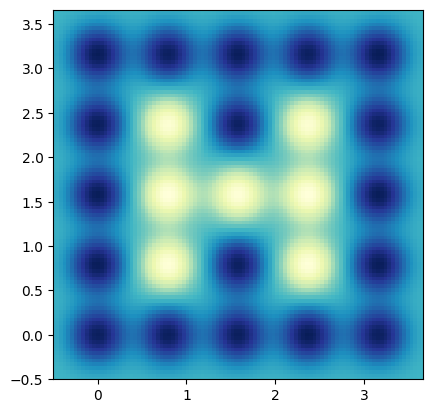

In [ ]:
C = C_iter[-1]

n = 100

xmin = np.min(R0[:,0]) - 0.5
xmax = np.max(R0[:,0]) + 0.5
ymin = np.min(R0[:,1]) - 0.5
ymax = np.max(R0[:,1]) + 0.5

X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

def phi_field(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R0)))), np.squeeze(C)))

batch_phi_field = vmap(phi_field)

fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
ax.pcolormesh(X, Y, np.reshape(batch_phi_field(positions_list), (n,n)),cmap='YlGnBu')

plt.show()

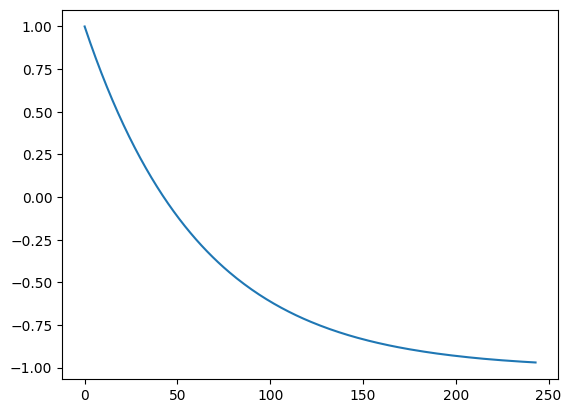

In [ ]:
plt.plot(np.array(C_iter)[:,8,0])

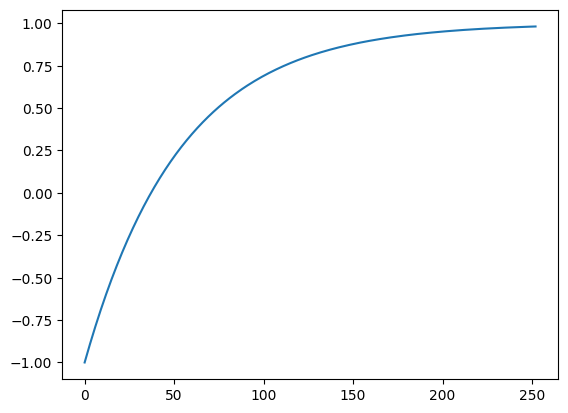

In [ ]:
plt.plot(np.array(C_iter)[:,0,0])

In [ ]:
np.save('C_iter_25_particles_new', C_iter, allow_pickle=True)

In [ ]:
np.save('cost_25_particles_new', cost, allow_pickle=True)

In [ ]:
np.save('free_energy_25_particles_new', free_energy, allow_pickle=True)

In [ ]:
np.save('control_cost_25_particles_new', control_cost, allow_pickle=True)

In [ ]:
np.save('control_25_particles_new', control, allow_pickle=True)

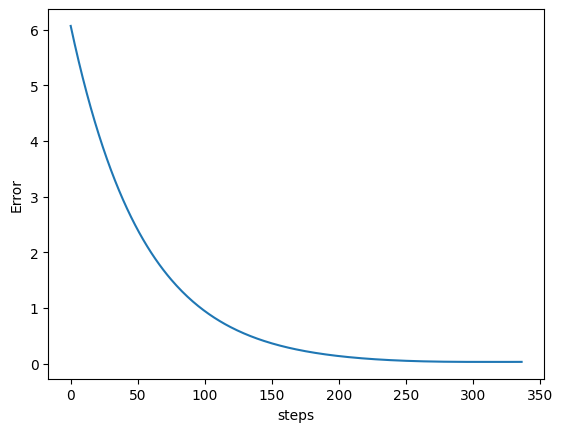

In [ ]:
plt.plot(cost)
plt.xlabel('steps')
plt.ylabel('Error')
plt.savefig('error.pdf',bbox_inches='tight')

In [ ]:
pwd

'/content/drive/MyDrive/generative_pattern_formation/cahn_allen'

In [ ]:
free_energy=[]
for i in range(len(C_iter)):
  free_energy.append(landau(C_iter[i]))


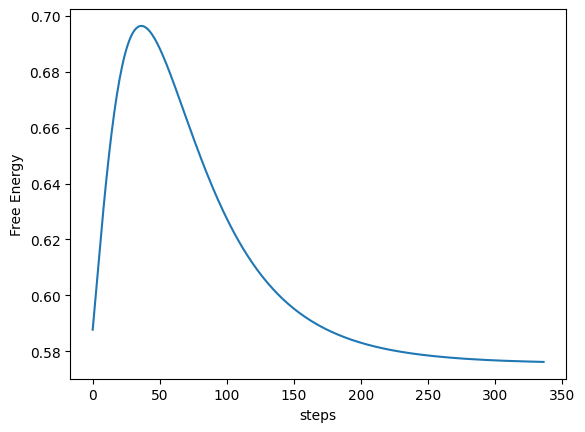

In [ ]:
plt.plot(free_energy)
plt.xlabel('steps')
plt.ylabel('Free Energy')
plt.savefig('free_energy.pdf',bbox_inches='tight')

In [ ]:
control_cost=[]
for i in range(len(control)):
  control_cost.append(np.sum(np.square(control[i])))


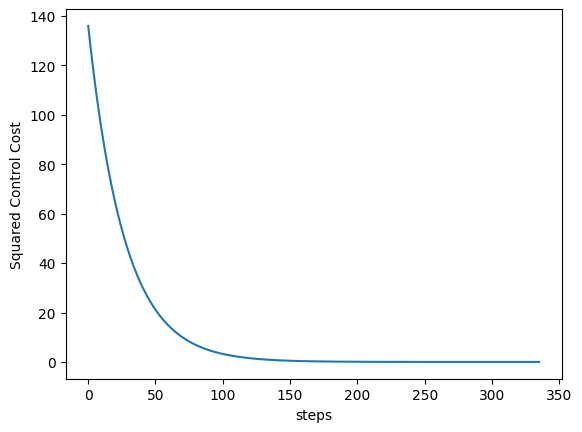

In [ ]:
plt.plot(control_cost)
plt.xlabel('steps')
plt.ylabel('Squared Control Cost')
plt.savefig('Squared Control Cost.pdf',bbox_inches='tight')

In [ ]:
control_cost[-1]

Array(0.00415711, dtype=float64)

In [ ]:
control[i].shape

(25, 1)

In [ ]:
control[0]

Array([[ 0.15590237],
       [ 3.70864248],
       [ 3.70867363],
       [ 0.3189351 ],
       [ 3.70697954],
       [ 0.16275899],
       [ 0.16323111],
       [ 0.00716278],
       [ 0.16326808],
       [ 3.70866639],
       [ 3.70866791],
       [ 0.00669717],
       [-3.55420551],
       [-0.14266933],
       [ 0.3119928 ],
       [ 3.70862319],
       [ 0.16326009],
       [ 0.00723221],
       [ 0.31262308],
       [ 3.55947384],
       [ 0.15585775],
       [ 0.16273543],
       [ 3.70862171],
       [ 3.71550641],
       [ 0.31201026]], dtype=float64)

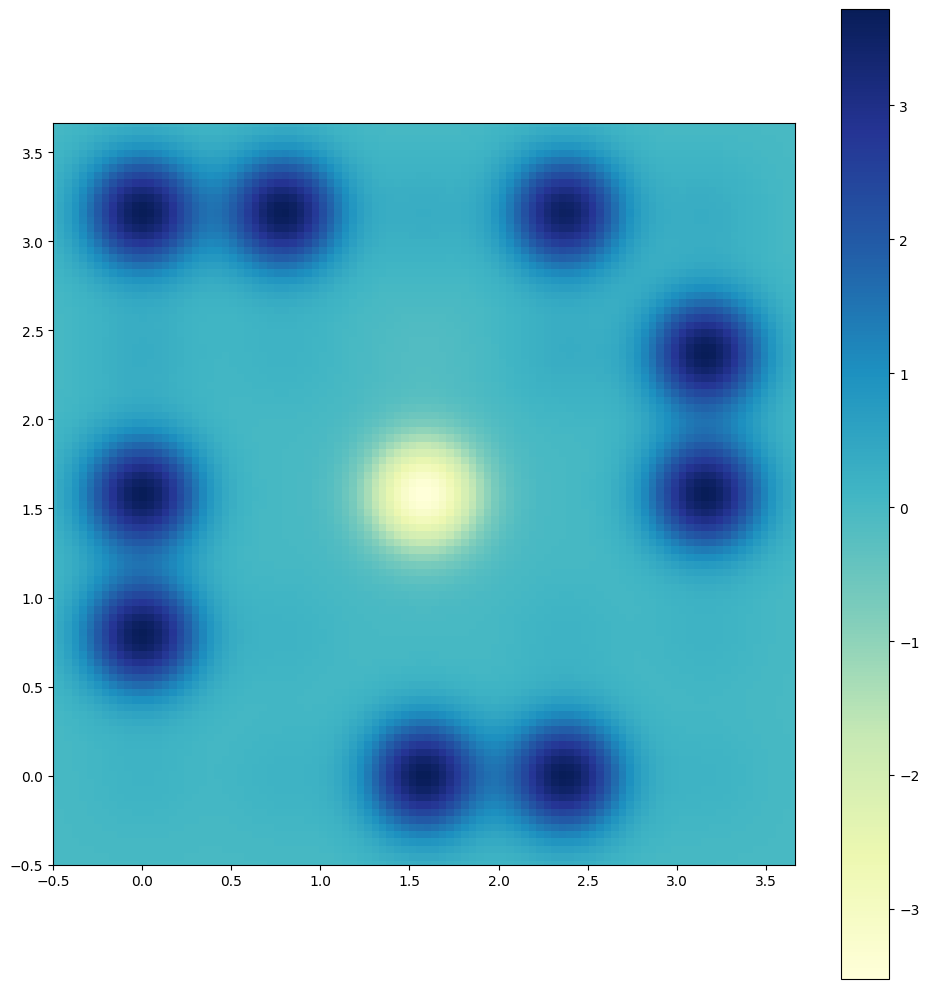

In [ ]:
C_control = control[0]

n = 100

xmin = np.min(R0[:,0]) - 0.5
xmax = np.max(R0[:,0]) + 0.5
ymin = np.min(R0[:,1]) - 0.5
ymax = np.max(R0[:,1]) + 0.5

X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

def chemical_control_field(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R0)))), np.squeeze(C_control)))

batch_chemical_control_field = vmap(chemical_control_field)

fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
im = ax.pcolormesh(X, Y, np.reshape(batch_chemical_control_field(positions_list), (n,n)),cmap='YlGnBu')
fig.colorbar(im, ax=ax)

plt.show()

In [ ]:
np.reshape(batch_chemical_control_field(positions_list), (n,n)).shape

(100, 100)

In [ ]:
control[-1]

Array([[-0.01790362],
       [-0.00565163],
       [-0.00545668],
       [-0.01910619],
       [-0.0066714 ],
       [-0.01720521],
       [ 0.01051004],
       [ 0.01641833],
       [ 0.01043198],
       [-0.00548165],
       [-0.00771228],
       [-0.01206769],
       [ 0.0029197 ],
       [-0.00939123],
       [-0.02143395],
       [-0.00582992],
       [ 0.01055745],
       [ 0.01644346],
       [ 0.00764793],
       [-0.00277725],
       [-0.0179685 ],
       [-0.01693747],
       [-0.00591383],
       [-0.00540638],
       [-0.02057576]], dtype=float64)

In [ ]:
np.sum(np.square(control[-1]))

Array(0.00394732, dtype=float64)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/generative_pattern_formation/cahn_allen/

/content/drive/MyDrive/generative_pattern_formation/cahn_allen


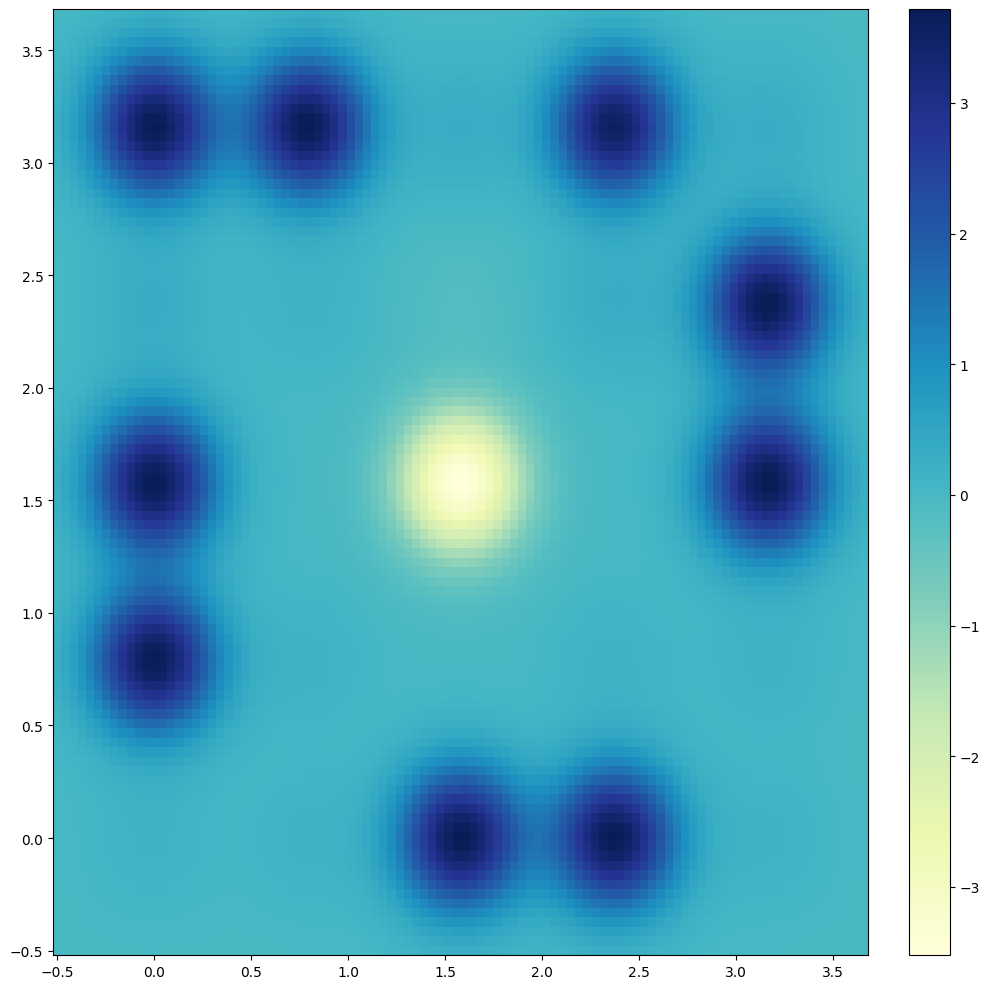

In [ ]:
no_of_frames=150
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()

ax = fig.add_subplot(111)
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')
#data = onp.random.rand(5, 5)
#im = ax.imshow(data)
#cb = fig.colorbar(im, cax=cax)
#tx = ax.set_title('Frame 0')
#cmap = ["copper", 'RdBu_r', 'Oranges', 'cividis', 'hot', 'plasma']

def animate(i):
   cax.cla()
   k = int(len(control)/no_of_frames)*i

   C_control = control[k]
   def chemical_control_field(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R0)))), np.squeeze(C_control)))

   batch_chemical_control_field = vmap(chemical_control_field)

   phi_eval_euler = np.reshape(batch_chemical_control_field(positions_list), (n,n))

   im = ax.pcolormesh(X, Y, phi_eval_euler,cmap='YlGnBu')
   fig.colorbar(im, cax=cax)
   #tx.set_text('Frame {0}'.format(i))
ani = animation.FuncAnimation(fig, animate, frames=no_of_frames)
ani.save("ca_control.gif", dpi=300, writer=PillowWriter(fps=10))

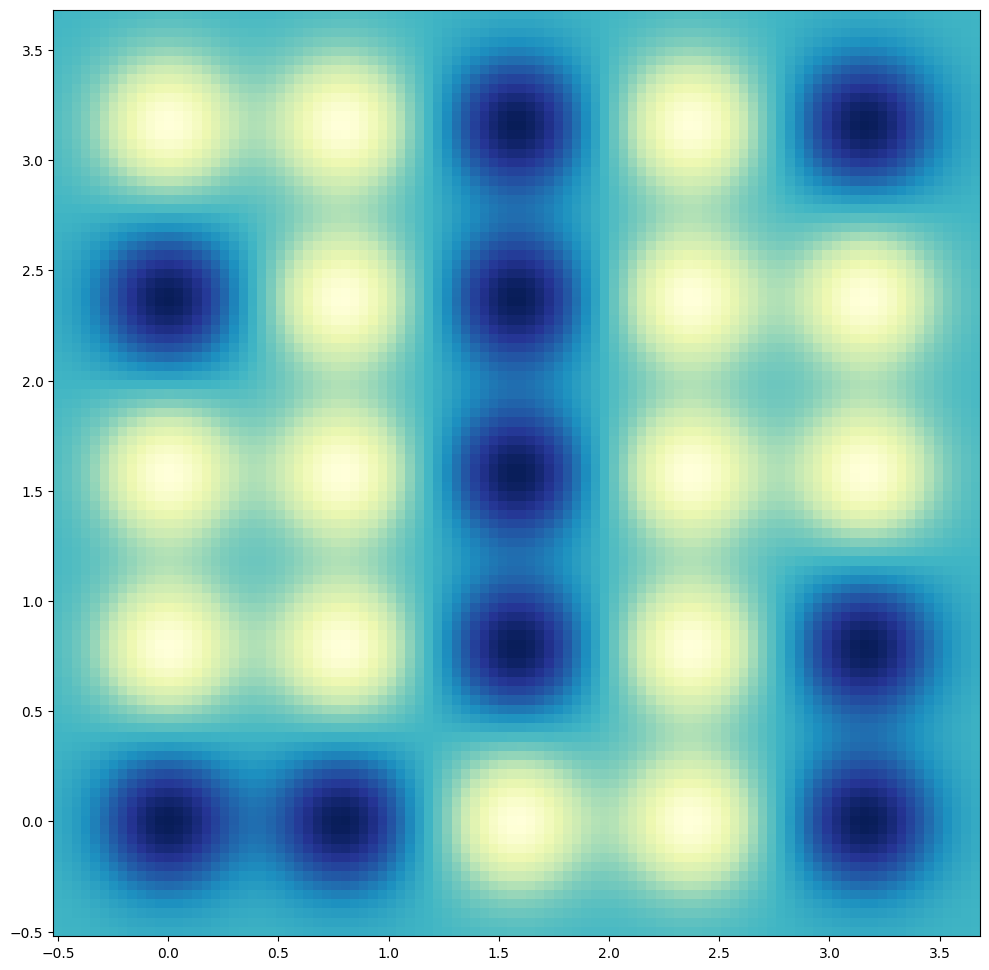

In [ ]:
no_of_frames=150
from matplotlib.animation import FuncAnimation, PillowWriter

fig_size = (10,10)
fig, ax = plt.subplots(figsize=fig_size)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')

def animate(j):
  #print(j)
  k = int(len(C_iter)/no_of_frames)*j
  #k=j
  ax.clear()

  C = C_iter[k]

  def phi_field(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R0)))), np.squeeze(C)))
  batch_phi_field = vmap(phi_field)

  phi_eval_euler = np.reshape(batch_phi_field(positions_list), (n,n))
  fgrnd1 = ax.pcolormesh(X, Y, phi_eval_euler,cmap='YlGnBu')

  return fgrnd1

ani = FuncAnimation(fig, animate, interval=50, blit=False, repeat=True, frames=no_of_frames)
ani.save("ca_controlled.gif", dpi=300, writer=PillowWriter(fps=10))

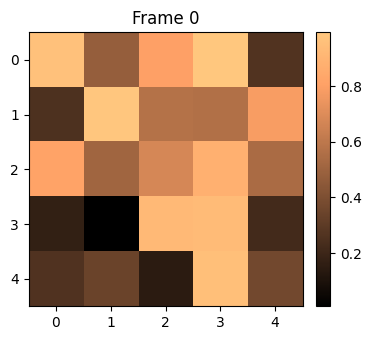

In [ ]:
import numpy as onp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()

ax = fig.add_subplot(111)
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')
#data = onp.random.rand(5, 5)
#im = ax.imshow(data)
#cb = fig.colorbar(im, cax=cax)
tx = ax.set_title('Frame 0')
cmap = ["copper", 'RdBu_r', 'Oranges', 'cividis', 'hot', 'plasma']

def animate(i):
   cax.cla()
   data = onp.random.rand(5, 5)
   im = ax.imshow(data, cmap=cmap[i%len(cmap)])
   fig.colorbar(im, cax=cax)
   tx.set_text('Frame {0}'.format(i))
ani = animation.FuncAnimation(fig, animate, frames=10)
ani.save("trial.gif", dpi=300, writer=PillowWriter(fps=10))

#plt.show()

##Curvature analysis

In [ ]:
ls

 ca_controlled.gif             control_25_particles_new.npy        free_energy_25_particles_new.npy
 ca_controlled_new.gif         control_cost_25_particles_new.npy   free_energy.pdf
 ca_quiver.gif                 cost_25_particles_new.npy          'Squared Control Cost.pdf'
 C_iter_25_particles_new.npy   error.pdf


In [ ]:
C_iter=np.load('Desktop/figures_ST/data/C_iter_25_particles_new.npy', allow_pickle=True)

In [ ]:
C_iter=np.load('C_iter_25_particles_new.npy', allow_pickle=True)

In [ ]:
C_iter.shape

(337, 25, 1)

In [ ]:
time=np.linspace(0,1,337)

In [ ]:
index_list=[1,2,4,9,10,12,15,19,22,23]

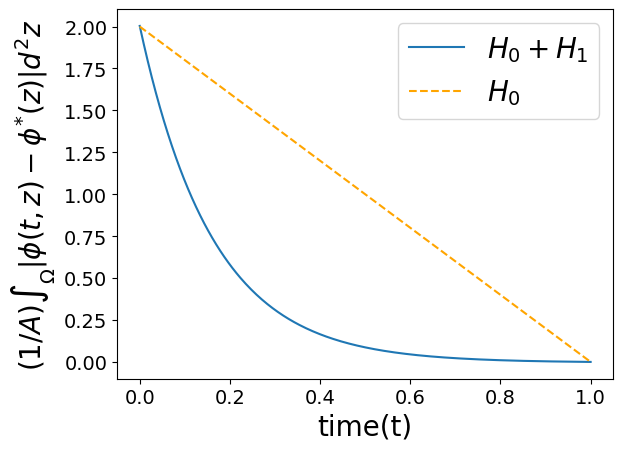

In [ ]:
plt.plot(time,np.mean(np.abs(np.array(C_iter)[:,index_list,0]-np.array(C_iter)[-1,index_list,0]),axis=1),label='$H_0+H_1$')
#plt.plot(time,-1+(2*time),'--k')
plt.plot(time,2-(2*time),'--',color='orange',label='$H_0$')
plt.xlabel('time(t)',fontsize=20)
plt.ylabel('$(1/A)\int_{\Omega}|\phi(t,z)-\phi^{*}(z)| d^2z$',fontsize=20)
#plt.title('Mean Curvature Over Time')
plt.legend(loc='best',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('trajectory_CA.pdf',bbox_inches='tight')

plt.show()

In [ ]:
C_iter_new=C_iter[0:200,index_list,0]

In [ ]:
C_iter_new.shape

(200, 10)

In [ ]:
len(index_list)

10

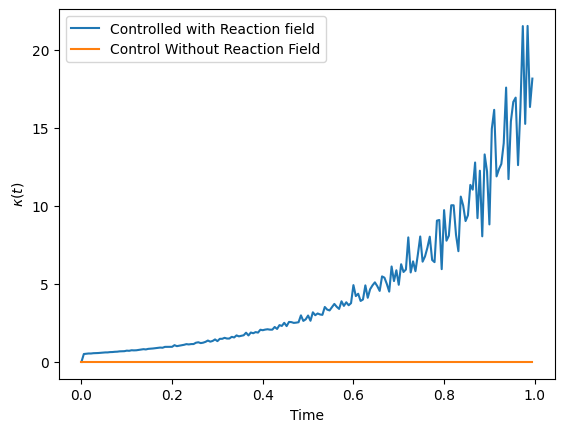

In [ ]:
import jax.numpy as jnp
from jax import vmap
import jax.lax as lax
import matplotlib.pyplot as plt

# Example C_iter_new array
T = 200
no_of_particles = 10
#C_iter_new = jnp.random.rand(T, no_of_particles)  # random example data

# Define a function to calculate the curvature for a single particle
def curvature(t, particle_data):
    # First derivative (velocity)
    dt = 1.0  # assuming uniform time steps

    first_derivative = lax.cond(
        (t > 0) & (t < T - 1),
        lambda _: (particle_data[t + 1] - particle_data[t - 1]) / (2 * dt),
        lambda _: 0.0,
        None
    )

    # Second derivative (acceleration)
    second_derivative = lax.cond(
        (t > 0) & (t < T - 1),
        lambda _: (particle_data[t + 1] - 2 * particle_data[t] + particle_data[t - 1]) / (dt**2),
        lambda _: 0.0,
        None
    )

    # Calculate curvature
    curvature_val = lax.cond(
        (t > 0) & (t < T - 1),
        lambda _: jnp.abs(second_derivative) / (jnp.abs(first_derivative)**2 + 1e-8),
        lambda _: 0.0,
        None
    )

    return curvature_val

# Vectorize the curvature calculation for all time steps
curvature_vmap = vmap(curvature, in_axes=(0, None))

# For each particle, calculate the curvature over time
curvature_over_time = jnp.array([curvature_vmap(jnp.arange(T), C_iter_new[:, particle_idx]) for particle_idx in range(no_of_particles)])

# Calculate the mean curvature across all particles for each time step
mean_curvature_over_time = jnp.mean(curvature_over_time, axis=0)

# Plot mean curvature as a function of time
plt.plot(jnp.arange(T)[0:T-10]/(T-10), mean_curvature_over_time[0:T-10],label='Controlled with Reaction field')
plt.plot(jnp.arange(T)[0:T-10]/(T-10), jnp.zeros(mean_curvature_over_time[0:T-10].shape),label='Control Without Reaction Field')
plt.xlabel('Time')
plt.ylabel('$\kappa(t)$')
#plt.title('Mean Curvature Over Time')
plt.legend(loc='best')
plt.savefig('curvature_CA.pdf',bbox_inches='tight')
plt.show()

In [ ]:
ls

drive/  sample_data/
